# Chapter 3: Mapping sea ice concentration

Creators: Ann Windnagel and Robyn Marowitz

Affiliation: [National Snow And Ice Data Center](https://nsidc.org/home)

In [1]:
from datetime import date, timedelta
from netCDF4 import Dataset

import xarray as xr
import numpy as np
import numpy.ma as ma
import pandas
import packaging
import aiohttp

import fsspec
import pystac
import netCDF4
from netCDF4 import Dataset
import h5netcdf
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

## Below we will repeat some code from Notebook 2 to access the STAC Item and the NetCDF 

In [2]:
collection = pystac.Collection.from_file('https://noaadata.apps.nsidc.org/NOAA/G02202_V4/stac/collection.json')
daily_sh_2023_item = collection.get_item("seaice_conc_daily_sh_2023_v04r00", recursive=True)
netcdf_url = daily_sh_2023_item.assets['netcdf'].href
fs = fsspec.filesystem('https')
ds = xr.open_dataset(fs.open(netcdf_url))

In [3]:
# Pull out sea ice concentration variable into numpy array
cdr_seaice_conc_var = ds.variables['cdr_seaice_conc']
cdr_seaice_conc_var

<xarray.Variable (tdim: 365, y: 332, x: 316)> Size: 153MB
[38292880 values with dtype=float32]
Attributes:
    long_name:            NOAA/NSIDC Climate Data Record of Passive Microwave...
    standard_name:        sea_ice_area_fraction
    units:                1
    flag_values:          [251 252 253 254 255]
    flag_meanings:        pole_hole lakes coastal land_mask missing_data
    datum:                +ellps=urn:ogc:def:crs:EPSG::4326
    grid_mapping:         projection
    reference:            https://nsidc.org/data/g02202/versions/4/
    ancillary_variables:  stdev_of_cdr_seaice_conc qa_of_cdr_seaice_conc
    valid_range:          [  0 100]
    cell_methods:         tdim: mean

## Exploring the Sea Ice Concentration Vairable
Above we have pulled out the Sea Ice Concentration Variable from the NetCDF and now we will explore the data and flag values.

In [12]:
# seaice_conc1 = cdr_seaice_conc_var.where(cdr_seaice_conc_var <= 1)
 # seaice_conc = seaice_conc1.where(seaice_conc1 >= 0)
# seaice_conc

In [13]:
cdr_seaice_conc = np.array(cdr_seaice_conc_var)
cdr_seaice_conc

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [24]:
# Here we are pulling out one day from our file. We chose day 0 so that is January 1, 2023
seaice_conc_1d = cdr_seaice_conc[0,:,:]
seaice_conc_1d

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

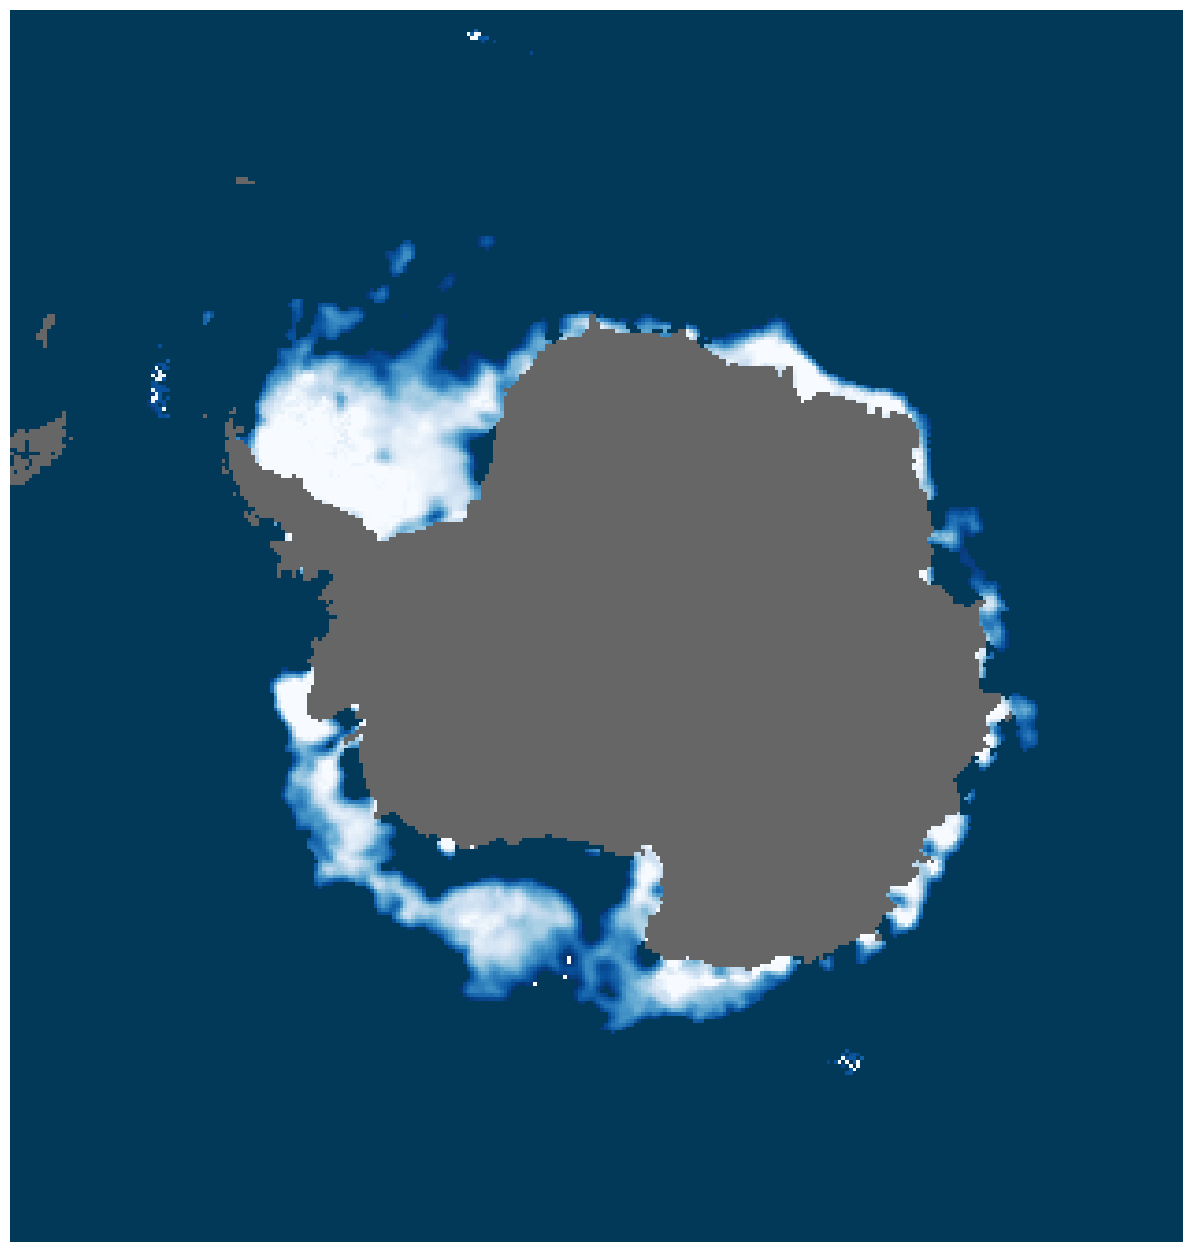

In [22]:
# Filter out any concentrations less than 15%
#sic_15 = ma.masked_outside(seaice_conc_np_2d_percent, 15, 255)
#filter out the ocean pixels = 0
ocean = ma.masked_outside(seaice_conc_1d, 0, 0)

# Only keep sea ice conentration i.e. Remove the land (254)
sic_15 = ma.masked_outside(seaice_conc_1d, .15, 1)

# filter out the land pixels = 254
land = ma.masked_outside(seaice_conc_1d, 2.54, 2.54)
coast = ma.masked_outside(seaice_conc_1d, 2.53, 2.53)
lakes = ma.masked_outside(seaice_conc_1d, 2.52, 2.52)

fig, ax1 = plt.subplots(figsize=(22, 16))
seaice_15_plot = ax1.imshow(sic_15, cmap='Blues_r', interpolation='none')
land_plot = ax1.imshow(land, cmap='Accent_r', interpolation='none')
coast_plot = ax1.imshow(coast, cmap='Accent_r', interpolation='none')
ocean_plot = ax1.imshow(ocean, cmap='PuBu_r', interpolation='none')
lake_plot = ax1.imshow(lakes, cmap='PuBu_r', interpolation='none')
plt.axis('off')


plt.show()

You can validate this image by checking for the seaice image here: https://noaadata.apps.nsidc.org/NOAA/G02135/south/daily/images/2023/01_Jan/S_20230101_conc_hires_v3.0.png